In [1]:
import pandas as pd
import numpy as np
import re;

In [7]:
# Task 1
energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38)
energy = energy.drop(columns=['Unnamed: 0', 'Unnamed: 1'])
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

In [4]:
pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
     ------------ ------------------------- 30.7/96.5 kB 445.2 kB/s eta 0:00:01
     ------------------------ ------------- 61.4/96.5 kB 469.7 kB/s eta 0:00:01
     -------------------------------------- 96.5/96.5 kB 616.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Task 2
energy['Energy Supply'] = energy['Energy Supply'] * 1000000
energy['Energy Supply'].replace('...', np.nan, inplace=True)

In [9]:
# Task 3
energy['Country'] = energy['Country'].apply(lambda x: re.sub(r'(\d+|\([^)]*\))', '', x.strip()))
energy['Country'] = energy['Country'].str.rstrip()

In [11]:
# Task 4
country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'].replace(country_rename, inplace=True)

In [51]:
energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,.................................................,...,0.641026
24,Bolivia,336000000,32,31.477120
164,South Korea,11007000000,221,2.279353


In [13]:
# Task 5
GDP = pd.read_csv('gpd.csv', skiprows=4)
country_rename_GDP = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
GDP['Country Name'].replace(country_rename_GDP, inplace=True)

In [50]:
GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [15]:
# Task 6
ScimEn = pd.read_excel('scimagojr.xlsx')
ScimEn = ScimEn[:15]

In [16]:
# Task 7
df = pd.merge(ScimEn, energy, how='inner', left_on='Country', right_on='Country')
df = pd.merge(df, GDP, how='inner', left_on='Country', right_on='Country Name')
df = df[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
         'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
         '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df = df.set_index('Country')

In [49]:
df.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Population,Citable documents per person,Above Median Renewables,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1367645161.290323,0.000093,1,Asia
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,317615384.615385,0.000298,0,North America
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,127409395.973154,0.000238,0,Asia


In [48]:
df.shape

(15, 24)

In [19]:
# Task 8
def task_eight():
    return df.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)[:15]

In [45]:
task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [21]:
# Task 9
def task_nine():
    top_15_avg = task_eight()
    fifth_largest = top_15_avg.index[4]
    gdp_change = df.loc[fifth_largest, '2015'] - df.loc[fifth_largest, '2006']
    return fifth_largest, gdp_change

In [44]:
task_nine()

('France', 153345695364.24023)

In [23]:
# Task 10
def task_ten():
    max_renewable_country = df['% Renewable'].idxmax()
    max_renewable_percentage = df.loc[max_renewable_country, '% Renewable']
    return max_renewable_country, max_renewable_percentage

In [43]:
task_ten()

('Brazil', 69.64803)

In [31]:
# Task 11
def task_eleven():
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sixth_populous = df['Population'].sort_values(ascending=False).index[5]
    return sixth_populous, df.loc[sixth_populous, 'Population']

In [42]:
task_eleven()

('Japan', 127409395.97315437)

In [32]:
# Task 12
correlation = df[['Citable documents per person', 'Energy Supply per Capita']].corr().iloc[0, 1]

In [41]:
correlation

0.7940010435442945

In [35]:
# Task 13
def task_thirteen():
    median = df['% Renewable'].median()
    df['Above Median Renewables'] = (df['% Renewable'] >= median).astype(int)
    return df['Above Median Renewables'].sort_index()

In [40]:
task_thirteen()

Country
Australia             0
Brazil                1
Canada                1
China                 1
France                1
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
United Kingdom        0
United States         0
Name: Above Median Renewables, dtype: int32

In [37]:
# Task 14
ContinentDict = {'China':'Asia', 
 'United States':'North America', 
 'Japan':'Asia', 
 'United Kingdom':'Europe', 
 'Russian Federation':'Europe', 
 'Canada':'North America', 
 'Germany':'Europe', 
 'India':'Asia', 
 'France':'Europe', 
 'South Korea':'Asia', 
 'Italy':'Europe', 
 'Spain':'Europe', 
 'Iran':'Asia', 
 'Australia':'Australia', 
 'Brazil':'South America'}

def task_fourteen():
    df['Continent'] = df.index.map(ContinentDict)
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    result = df.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return result

In [39]:
task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


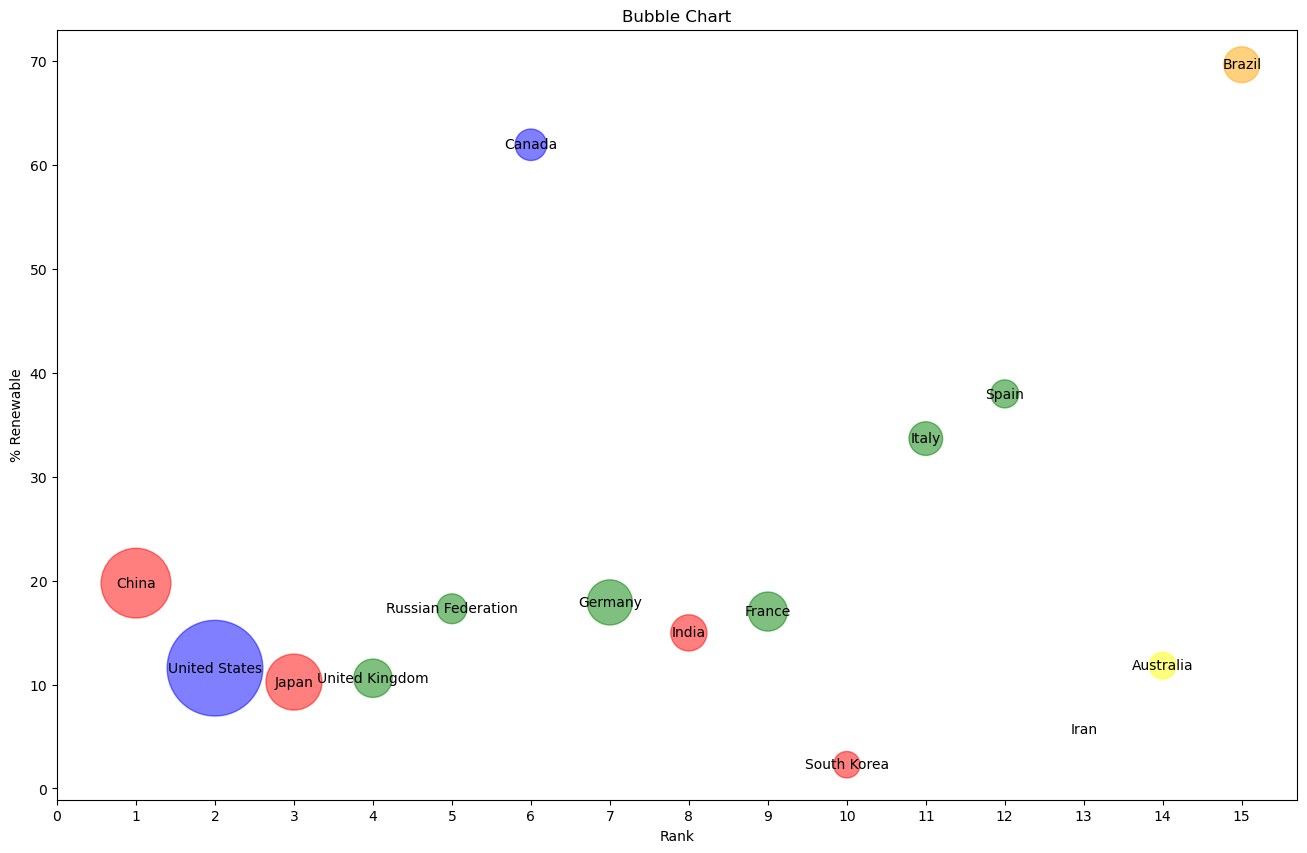

In [54]:
# Task 15
import matplotlib.pyplot as plt

colors = {'Asia':'red', 'North America':'blue', 'Europe':'green', 'Australia':'yellow', 'South America':'orange'}

ax = df.plot.scatter(x='Rank', y='% Renewable', s=df['2015']/9**10, c=df['Continent'].apply(lambda x: colors[x]), alpha=0.5, figsize=(16, 10))

ax.set_xticks(range(16))
ax.set_yticks(range(0, 71, 10))

for i, txt in enumerate(df.index):
    ax.annotate(txt, (df['Rank'][i], df['% Renewable'][i]), fontsize=10, ha='center', va='center')

plt.title('Bubble Chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

plt.show()